In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [2]:
#parameter setting
amp=1                      #진폭
sr=10000
dur=0.5
freq=440.0

#parameter setting
#amp = 1          #range [0.0, 1.0]
#sr = 10000      #sampling rate, Hz. 얼마나 고해상도로 하는가. 1초에 1만개로 표시하겠다.
#dur = 0.5       #in seconds
#freq = 100.0    #sine frequency. Hz. 일초에 태극문양이 얼마나 들어가느냐.

In [3]:
#generate time

#t=np.arange(1,sr*dur)   얘는 시간 개념을 먼저 넣어준 것. 근데 여기는 time tic을 준 거고, '몇 초'로 만들려면 sr로 나눔
t=np.arange(1,sr*dur+1)/sr     #마지막것 포함해줬고 더하기 일 함으로서, sr로 나눠주면서 초 개념 생성


#타임을 먼저 만들어야 함! sr, dur가 필요.
#t=0.00001 0.00002 0.00003 ... 0.50000 이런거를 만드는 건데 이거 만드려면 한참 걸리니까 쉽게!
#이해의 순서가
#t=np.arange(1,sr+1)          #1~10000
#t=np.arange(1,sr*dur+1)     #1~5000
#t=np.arange(1,sr+dur+1)/sr  #1/10000~5000/10000

In [4]:
t
#e-01:1/10

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [6]:
#generate phase
theta=t*2*np.pi*freq                    #freq만큼 바퀴 돌자! freq없으면 그냥 1번 도는 것

In [7]:
#generate signal by cosine-phasor
s=amp*np.cos(theta)
#sin,cos 둘다 소리 똑같음. 귀가 phase(각도)에는 sensitive하지 않다. 우리는 phase shift 인식하지 못함.
#우리는 frequency에 민감

In [8]:
#time에 있는 벡터의 개수와 theta에 있는 벡터의 개수는 같음
#총 5천개의 time 벡터

Text(0,0.5,'real')

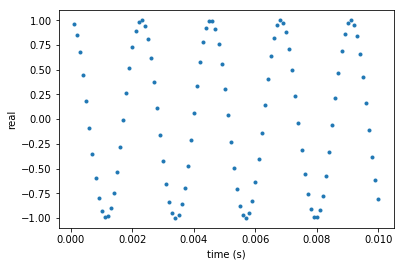

In [9]:
fig=plt.figure()                    #figure는 화면 전체.
ax=fig.add_subplot(111)
ax.plot(t[0:100],s[0:100],'.')      #0~100 안 정하면 너무 빽빽해서 태극문양이 안 보임
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

#2차원 벡터로 표현. 여기있는 점들의 개수는 100개.

In [7]:
ipd.Audio(s,rate=sr)

In [8]:
#generate signal by complex-phasor
c=amp*np.exp(theta*1j)         #np.exp = e라고 생각하면 됨. 오일러식에 나오는. 1j는 i임. 허수 뜻하는;
c

#결국 다 고정이고 theta값만 바뀜

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

Text(0.5,0,'imag')

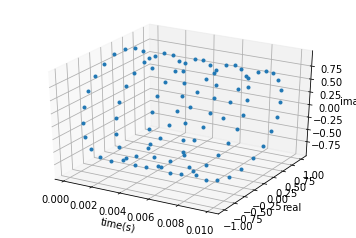

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot(t[0:100],c.real[0:100],c.imag[0:100], '.')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

#원통 모형으로 봤을 때 반지름이 1(amp값임)

In [10]:
ipd.Audio(c.real, rate=sr)

#ipd.Audio(s,rate=sr)
#이거는 위의 식이랑 같음

# Generate pulse train

sampling rate이 100 hz라고 생각해보면, 표현할 수 있는 숫자가 1초에 100개라는 뜻.
이 100개의 숫자를 가지고 1hz의 frequency를 표현할 수 있을까? Yes. 1번의 sine wave로 표현 가능.
10,000hz는 가능할까? No. 우리가 가지고 있는 숫자가 너무 적음. sr이 충분히 있어야 그만한 주파수를 표현 가능.
ex. sr=10 hz, freq=100hz 이면 최대 sr/2까지 표현 가능. 즉 sr=10hz이면 freq=5hz가 맥시멈 ==> "Nyquist frequency" is 5hz.

사람이 들을 수 있는 가청주파수가 20,000hz임. 그래서 sr=44100hz이면 freq=22050hz라서 cd 음질이 sr=44100hz임
유선 전화기는 sr=8000hz라서 내용은 다 들리지만 미묘한 목소리 차이는 전할 수 없음.
현재 스마트폰은 sr=16000hz라서 누구인지 구분이 잘 됨

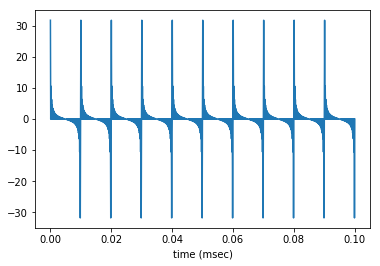

In [11]:
F0=100
Fend = int(sr/2)    #nyquist frequnecy
s=np.zeros(len(t))
#time은 위에서 만들었으니 이미 만들었다고 가정.
for freq in range(F0, Fend+1, F0):
    theta = t*2*np.pi*freq
    tmp=amp*np.sin(theta)
    s=s+tmp                 
    #제일 처음 s가 무엇인가 정의를 해줘야 함. s*tmp니까 저 s가 뭔지 정의되어야 저 수식의 첫 s가 나옴.
    #그게 위에 있는 s=np.zeros(lent(t)) 얘의 의미
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(t[0:1000],s[0:1000])
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

#얘는 spectrum이 아님.(녹음)

In [12]:
def hz2w(F,ar):
    NyFreq = sr/2
    w = F/NyFreq *np.pi
    return w                   #출력

def resonance(srate,F,BW):
    a2=np.exp(-hz2w(BW,srate))
    omega=F*2*np.pi/srate
    a1=-2*np.sqrt(a2)*np.cos(omega)
    a=np.array([1,a1,a2])
    b=np.array([sum(a)])
    return a,b

In [13]:
RG=0                            # RG is the frequency of the Glottal Resonator
BWG=100                         # BWG is the bandwidth of the Glottal Resonator
a,b=resonance(sr,RG,BWG)        #Bandwidth 산맥이 얼마나 뚱뚱하냐, 뾰족하냐. 100 이면 꽤 뚱뚱, 60이면 뾰족
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

#decreasing한 효과가 있음.

In [14]:
RG=500
BWG=60
a,b=resonance(sr,RG,BWG)        #Bandwidth 산맥이 얼마나 뚱뚱하냐, 뾰쪽하냐
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

In [15]:
RG=1500
BWG=200
a,b=resonance(sr,RG,BWG)        #Bandwidth 산맥이 얼마나 뚱뚱하냐, 뾰쪽하냐
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

In [16]:
RG=2500
BWG=200
a,b=resonance(sr,RG,BWG)        #Bandwidth 산맥이 얼마나 뚱뚱하냐, 뾰쪽하냐
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

In [17]:
RG=3500
BWG=200
a,b=resonance(sr,RG,BWG)        #Bandwidth 산맥이 얼마나 뚱뚱하냐, 뾰쪽하냐
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

In [18]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [19]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

#original target signal 's'

# Fourier transform

In [28]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))              #complex phasor를 이용한 라인
                                                            # (exponential) (e^wi)^[0 ... 100 벡터]
                                                            # 첫 번째, omega w = (2ㅠ * 0 [0...100]/100)i
                                                            # 두 번째, omega w = (2ㅠ * 1 [0..100]/100)i
                                                            #                  = [0...2ㅠ]i: 결국 한 바퀴 도는 것,
                                                            #                    한 바퀴를 100개의 샘플로
                                                            # 세 번째: (2pi * 2 [0..100]/100)i = [0...4ㅠ]i
    amp.append(np.abs(np.dot(s,z)))                         #amp는 루프의 횟수만한 크기: len(amp)
                                                            #amp에는 허수가 없음. absolute(절대값)을 했기 때문
                                                            # dot product 확실히 이해하기!!!!!

Text(0,0.5,'amplitude')

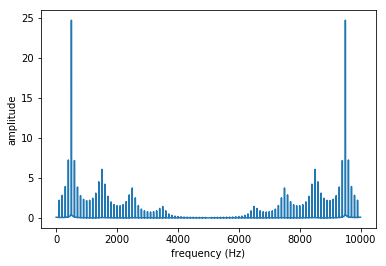

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1, nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

#bar의 개수와 sample의 개수가 같음
#왼쪽과 오른쪽이 대칭: 5000까지 (half)만 의미가 있음. nyquist frequency
#해당 freq의 에너지가 얼마나 있는지

# define helper function

In [30]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# Preprocessing Signal

In [31]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xacc3668>)

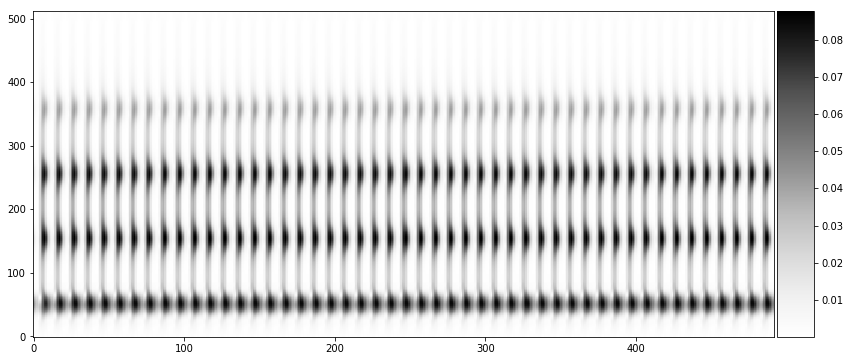

In [32]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

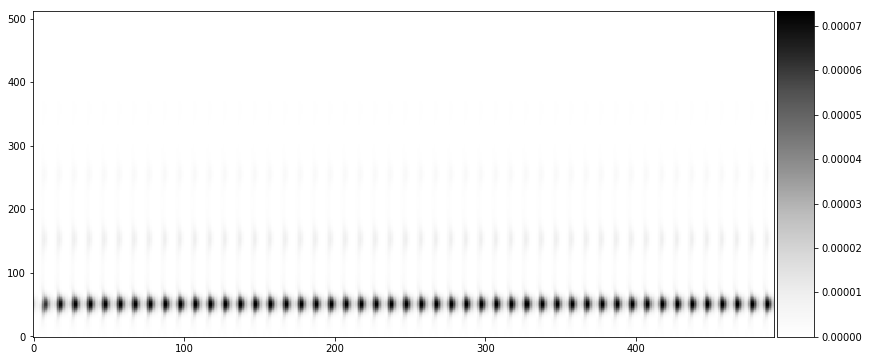

In [25]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

#연한 부분은 1보다 작은 값이 나오고 진한 부분은 1보다 큰 값이 나옴
#이 값에 어떤 제곱값을 취함. 그 다음 로그 처리함. 그럼 reasonable한 숫자가 나옴. ex) 0.01 -> log10^-2 = -2

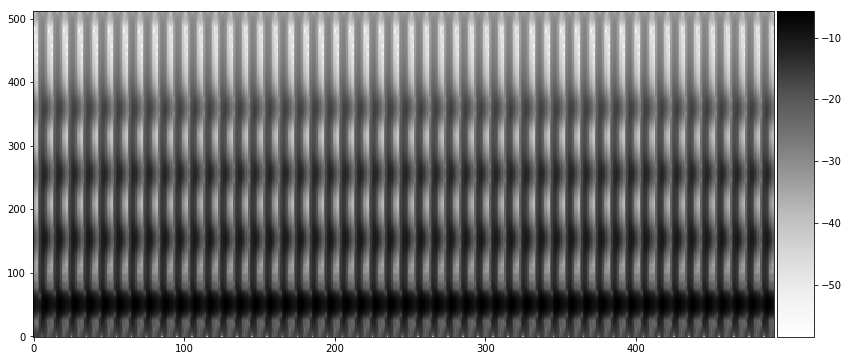

In [26]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

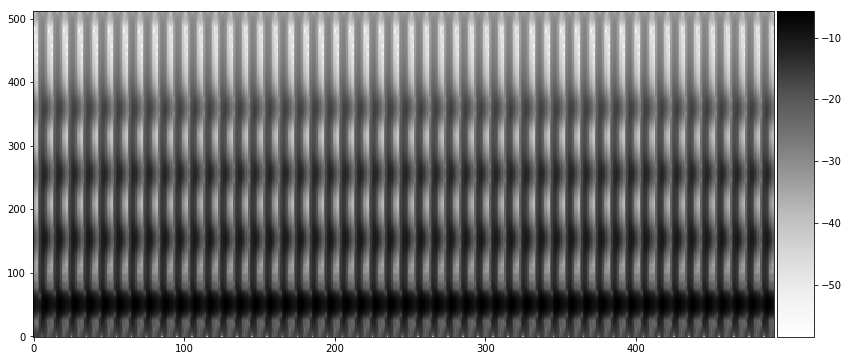

In [27]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);